In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [7]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [18]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [20]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

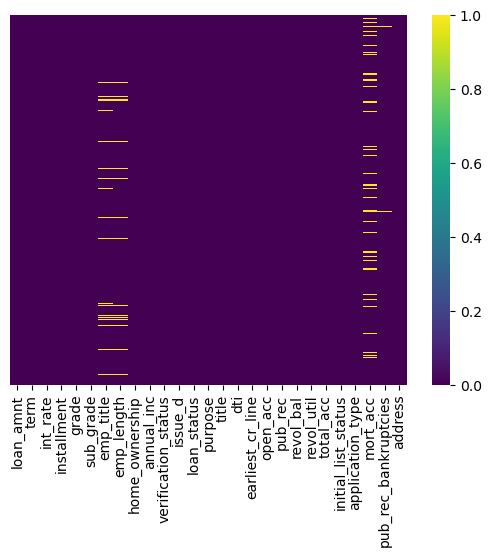

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
plt.show()

Exploratory Data Analysis


C:\Users\User\AppData\Local\Temp\ipykernel_7332\2362435414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='loan_status',palette='viridis')


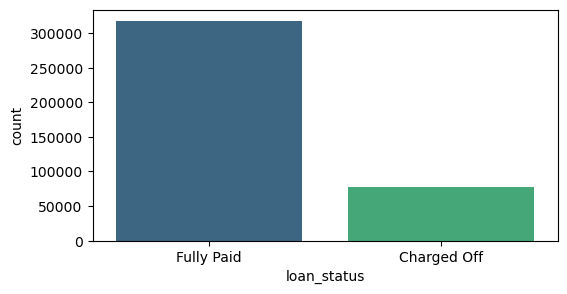

In [714]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='loan_status',palette='viridis')
plt.show()

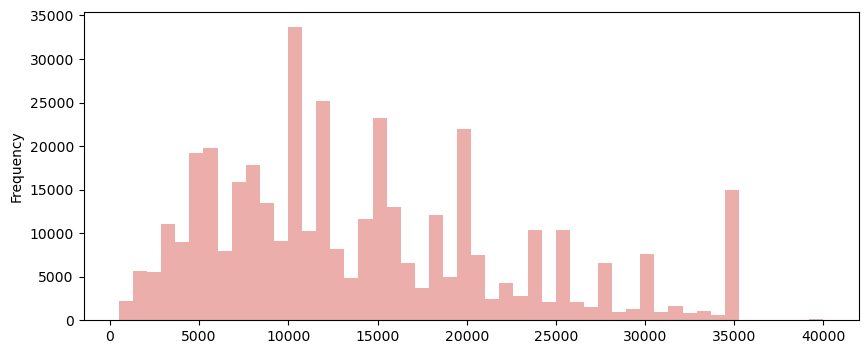

In [596]:
df['loan_amnt'].plot(kind='hist',bins=50,figsize=(10,4),alpha=.5)
plt.show()

In [503]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


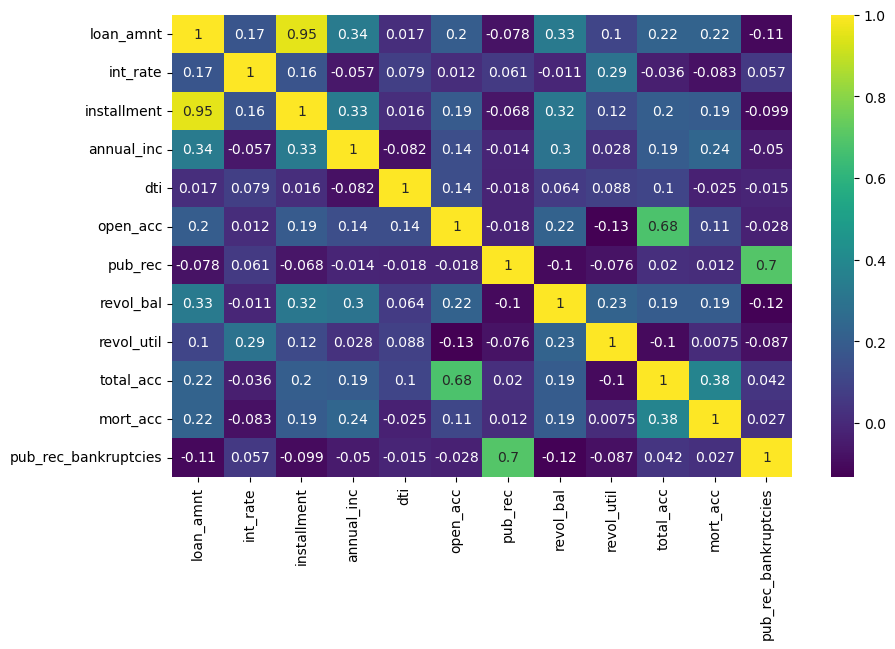

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap='viridis',annot=True)
plt.show()

In [26]:
data_info.loc['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [28]:
data_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

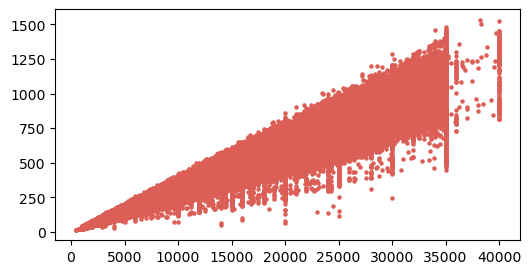

In [720]:
plt.figure(figsize=(6,3))
plt.scatter(x=df['loan_amnt'],y=df['installment'],s=5)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7332\147904785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='loan_status',y='loan_amnt',palette='viridis')


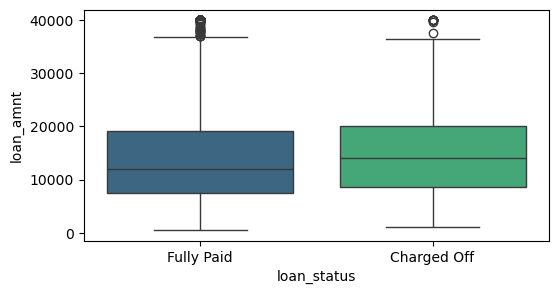

In [722]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df,x='loan_status',y='loan_amnt',palette='viridis')
plt.show()

In [724]:
df.groupby('loan_status')['loan_amnt'].describe()
#This shows that loans that are waived off on avg are of a higher amount than the ones that were fully paid by customers.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [153]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [157]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

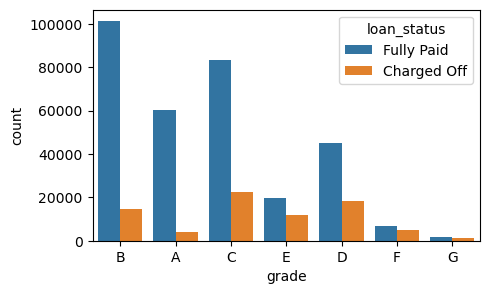

In [167]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x='grade',hue='loan_status')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7332\3564348067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='sub_grade',palette='coolwarm',order=sorted(df['sub_grade'].unique()))


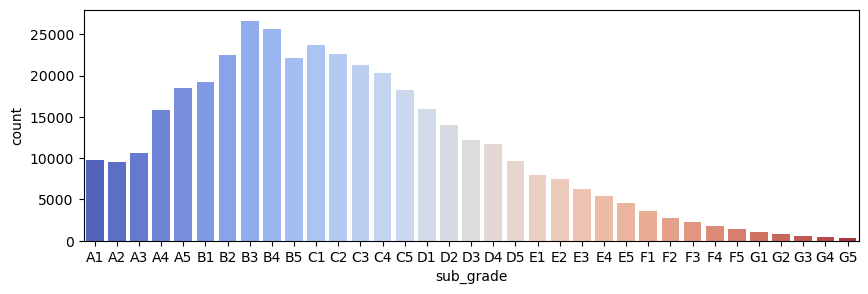

In [183]:
plt.figure(figsize=(10,3))
sns.countplot(data=df,x='sub_grade',palette='coolwarm',order=sorted(df['sub_grade'].unique()))
plt.show()

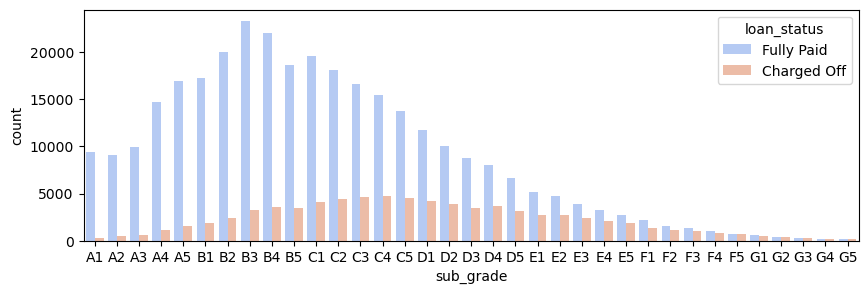

In [726]:
plt.figure(figsize=(10,3))
sns.countplot(data=df,x='sub_grade',palette='coolwarm',order=sorted(df['sub_grade'].unique()),hue='loan_status')
plt.show()

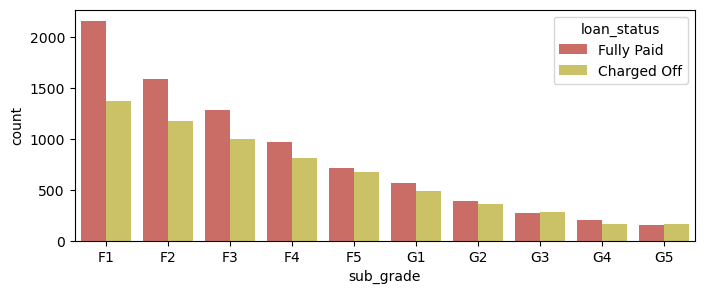

In [728]:
plt.figure(figsize=(8,3))
sns.countplot(data=df[(df['grade']=='F') | (df['grade']=='G')],x='sub_grade',hue='loan_status',
              order=sorted(df[(df['grade']=='F') | (df['grade']=='G')]['sub_grade'].unique()))
plt.show()

In [30]:
def integerStatus(status):
    if status == 'Fully Paid':
        return 1
    if status == 'Charged Off':
        return 0
        
df['loan_repaid'] = df['loan_status'].apply( integerStatus )

In [32]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


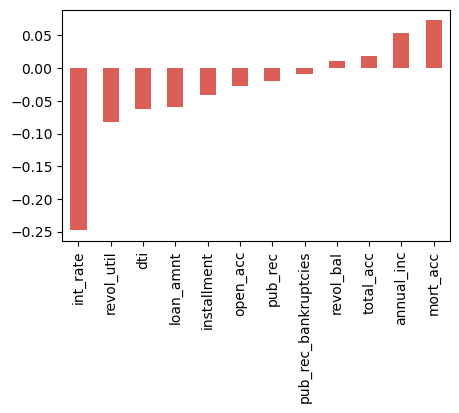

In [734]:
plt.figure(figsize=(5,3))
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')
plt.show()

Feature Engineering & Converting text based columns to Numeric based for ML model to understand

In [511]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


Handling Null values and missing data

In [36]:
len(df)

396030

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [44]:
data_info.loc['emp_title'].Description

'The job title supplied by the Borrower when applying for the loan.*'

In [744]:
df['emp_title'].nunique()

173105

In [616]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [46]:
df.drop('emp_title',axis=1,inplace=True)

In [48]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [750]:
df.groupby('emp_length')['emp_length'].count().sort_values(ascending=False).index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object', name='emp_length')

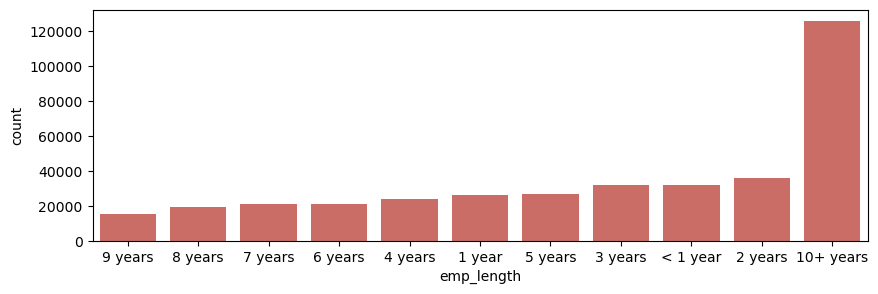

In [752]:
plt.figure(figsize=(10,3))
sns.color_palette('Paired')
sns.countplot(data=df,x='emp_length',order=df.groupby('emp_length')['emp_length'].count().sort_values(ascending=True).index)
plt.show()

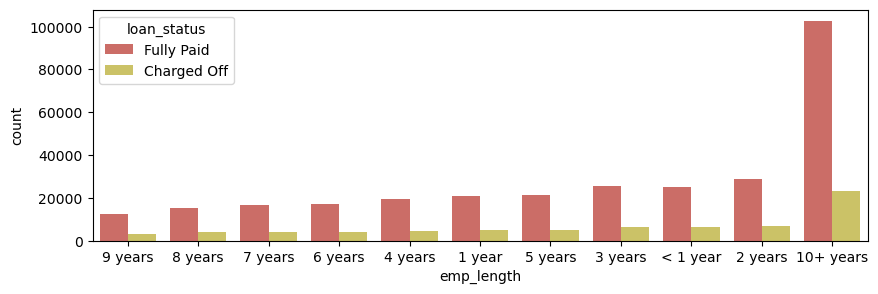

In [754]:
plt.figure(figsize=(10,3))
sns.countplot(data=df,x='emp_length',order=df.groupby('emp_length')['emp_length'].count().sort_values(ascending=True).index,hue='loan_status')
plt.show()

In [50]:
df1 = pd.DataFrame(df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status'])

In [52]:
df2 = pd.DataFrame(df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status'])

In [54]:
(df1/df2)

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


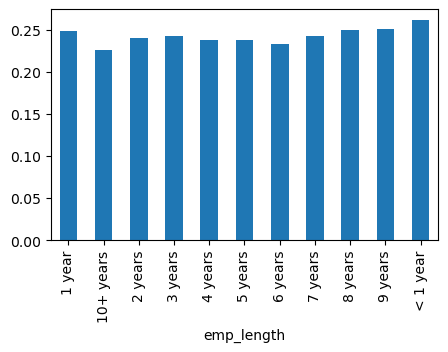

In [56]:
(df1/df2).plot(kind='bar',legend=False,figsize=(5,3))
plt.show()

In [58]:
df.drop('emp_length',axis=1,inplace=True)

In [60]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [62]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [64]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [66]:
df.drop('title',axis=1,inplace=True)

In [68]:
data_info.loc['mort_acc'].Description

'Number of mortgage accounts.'

In [70]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [72]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [74]:
temp = pd.DataFrame(df.groupby('total_acc')['mort_acc'].mean())
temp

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [76]:

def updateMort_Acc(item):
    if np.isnan( item[1] ):
        return temp.loc[item[0]]['mort_acc']
    else:
        return item[1]
        

df['mort_acc'] = df[['total_acc','mort_acc']].apply( lambda item : updateMort_Acc(item) ,axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_19116\421005844.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan( item[1] ):
C:\Users\User\AppData\Local\Temp\ipykernel_19116\421005844.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return item[1]
C:\Users\User\AppData\Local\Temp\ipykernel_19116\421005844.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return temp.loc[item[0]]['mort_acc']


In [78]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [81]:
df.dropna(inplace=True)

In [83]:
len(df)

395219

In [85]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

Creating Dummy Variables for Categorical Data

In [796]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [87]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [89]:
df['term'].iloc[0].strip()

'36 months'

In [91]:
def convertToInteger(item):
    if item.strip() == '36 months':
        return 36
    else:
        return 60

df['term'] = df['term'].apply(lambda item : convertToInteger(item) )

In [93]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [95]:
df.drop('grade',axis=1,inplace=True)

In [97]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],dtype=int,drop_first=True)

In [99]:
df = df.join(sub_grade_dummies)

In [101]:
df.drop('sub_grade',axis=1,inplace=True)

In [103]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [105]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [107]:
#'verification_status', 'application_type','initial_list_status','purpose'
verification_status_dummies = pd.get_dummies(df['verification_status'],dtype=int,drop_first=True)
application_type_dummies = pd.get_dummies(df['application_type'],dtype=int,drop_first=True)
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'],dtype=int,drop_first=True)
purpose_dummies = pd.get_dummies(df['purpose'],dtype=int,drop_first=True)


In [109]:
df = df.join(verification_status_dummies)
df = df.join(application_type_dummies)
df = df.join(initial_list_status_dummies)
df = df.join(purpose_dummies)

In [111]:
df.drop('verification_status',axis=1,inplace=True)
df.drop('application_type',axis=1,inplace=True)
df.drop('initial_list_status',axis=1,inplace=True)
df.drop('purpose',axis=1,inplace=True)

In [113]:
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [115]:
def setOwnership(item):
    if item.strip() == 'NONE':
        return 'OTHER'
    elif item.strip() == 'ANY':
        return 'OTHER'
    else:
        return item

df['home_ownership'] = df['home_ownership'].apply(lambda item : setOwnership(item) )

In [117]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True,dtype=int)

In [119]:
df = df.join(home_ownership_dummies)

In [121]:
df.drop('home_ownership',axis=1,inplace=True)

In [123]:
df['zip_code'] = df['address'].apply(lambda address : address.split()[-1] )

In [125]:
zip_code_dummies = pd.get_dummies(df['zip_code'],drop_first=True,dtype=int)

In [127]:
df = df.join(zip_code_dummies)

In [129]:
df.drop('address',axis=1,inplace=True)
df.drop('zip_code',axis=1,inplace=True)

In [131]:
df.drop('issue_d',axis=1,inplace=True)

In [133]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date : int(date.split('-')[-1])  )

In [135]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [137]:
df.drop('loan_status',axis=1,inplace=True)

In [139]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

Creating Train & Test Data

In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X = df.drop('loan_repaid',axis=1)
y = df['loan_repaid']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Normalizing the data using preprocessing classes from sklearn

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scalar = MinMaxScaler()

In [151]:
X_train = scalar.fit_transform(X_train)

In [152]:
X_test = scalar.transform(X_test)

Creating model using tensorflow

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import callbacks

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [156]:
#binary classification problem
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(19,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [157]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [158]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [163]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=25,batch_size=256,callbacks=[early_stopping])

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.3529 - val_loss: 0.2687
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2648 - val_loss: 0.2638
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2615 - val_loss: 0.2644
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2611 - val_loss: 0.2625
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2592 - val_loss: 0.2636
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2584 - val_loss: 0.2629
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2598 - val_loss: 0.2625
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2589 - val_loss: 0.2629
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2579 - val_loss: 0.2618
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2582 - val_loss: 0.2623
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2567 - val_loss: 0.2613
Epoch 12/25
1236/1236 ━━━━━━━

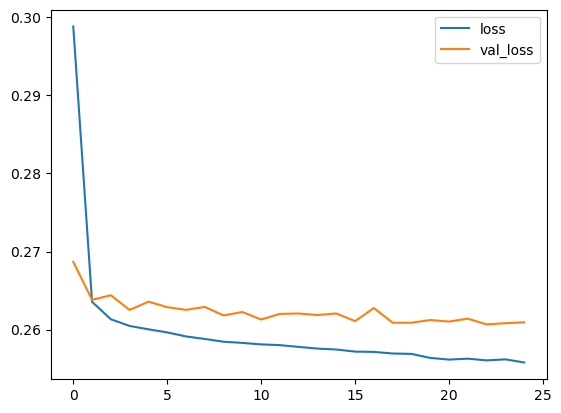

In [169]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [171]:
from tensorflow.keras.models import load_model

In [175]:
model.save('loan_repayment_prediction.keras')

Evaluating Model Performance

In [177]:
predictions = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


In [181]:
p = ( predictions > 0.5 ).astype('int32')

In [187]:
from sklearn.metrics import classification_report,confusion_matrix

In [189]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [191]:
print(confusion_matrix(y_test,p))

[[ 6841  8817]
 [   77 63309]]


Predicting whether a new customer with given details will be granted the loan or Not.

In [193]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [199]:
new_customer = new_customer.values.reshape(-1,78)

In [205]:
pred = model.predict(new_customer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [209]:
p = (pred> 0.5).astype('int32')

In [211]:
p

array([[1]])